In [1]:
from sympy.physics.optics import RayTransferMatrix, ThinLens, BeamParameter
from sympy import symbols, init_printing, pi, sqrt, pprint, solveset, S
from scipy.constants import c
import matplotlib.pyplot as plt
import numpy as np
init_printing()

from ipywidgets.widgets import IntSlider, FloatLogSlider, FloatSlider, interactive_output, FloatRangeSlider
from IPython.display import display

In [2]:
f1, f2, f3, r1, r2 = symbols('f1, f2, f3, r1, r2') # waist distances in cm
w1, w2, w3, w4 = symbols('w1, w2, w3, w4') # waist radius in cm

w, lam, w0, z =symbols('w, lam, w0, z', positive=True)

z_r = pi*w0**2/lam
R = z(1+(z_r/z)**2)
w = w0*sqrt(1+(z/z_r)**2)

ghz_cm = lambda x: c*1e2/x*1e-9

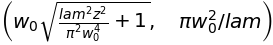

In [53]:
w, z_r

In [50]:
def w_func(W, L, Z):
    W = np.linspace(*W, 20)
    y = []
    for i in W:
        temp = float(w.subs({w0:i, lam:ghz_cm(L), z:Z}).evalf(4))
        y.append(temp)
    fig, ax = plt.subplots(figsize=(10,5))
    l, = ax.plot(W, y, '.', label=f'z: {Z} cm, lambda: {L} GHz')
    
   
    w0_, w_in2 = l.get_data()
    print(f'Checking: w0: \n{w0_}\nw_in2: \n{w_in2}\n')
    
    ind = np.argwhere(np.logical_and(w_in2<=0.4, w_in2>0.37))
    
    if w_in2.min()<=0.4:
        w_in1 = []
        for i in w0_[ind]:
            temp = float(w.subs({w0:i, lam:ghz_cm(L), z:(10.4-Z)}).evalf(4))
            w_in1.append(temp)
        w_in1 = np.array(w_in1)
        
        print(f'w0: {w0_[ind].reshape(len(ind))}\nw_in1: {w_in1}\nw_in2: {w_in2[ind].reshape(len(ind))}\n')
        
        ax.plot(w0_[ind], w_in1, 'x', label = f'w_in1: z = {(10.4-Z):.2f} cm from w4')
        
        print('Filtering by w_in1 min=0.3 and max=0.97\n')
        ind2 = np.argwhere(np.logical_or(w_in1.max()<=0.97, w_in1.max()>=0.3))
        #print(f'ind2: {ind2}')
        print(f'w0:{w0_[ind][ind2]}\n(w_in1, w_in2): ({w_in1[ind2]}, {w_in2[ind][ind2]})')
    
    else: print(f'w_in2 minimum reached: {w_in2.min()}\n')
        
    ax.set_xlabel('w0-Beam waist radius at z=0')
    ax.set_ylabel(f'w_in2 - z: {Z} cm from w4')
    ax.legend()
    ax.grid()
    
W = FloatRangeSlider(
    value=[0.1, 0.5],
    min=0.1,
    max=1,
    step=0.01,
    description='w0:',
)
L = FloatSlider(min=70, max=1000, value=400, step=1, description='GHz')
Z = FloatSlider(min=0, max=10, value=3, step=0.001, description='z:')

out = interactive_output(w_func, {'W':W, 'L':L, 'Z':Z})
display(W, L, Z, out)

FloatRangeSlider(value=(0.1, 0.5), description='w0:', max=1.0, min=0.1, step=0.01)

FloatSlider(value=400.0, description='GHz', max=1000.0, min=70.0, step=1.0)

FloatSlider(value=3.0, description='z:', max=10.0, step=0.001)

Output()